In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jane-street-market-prediction/example_sample_submission.csv
/kaggle/input/jane-street-market-prediction/features.csv
/kaggle/input/jane-street-market-prediction/example_test.csv
/kaggle/input/jane-street-market-prediction/train.csv
/kaggle/input/jane-street-market-prediction/janestreet/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/jane-street-market-prediction/janestreet/__init__.py


In [2]:
%%time
import datatable


path = '/kaggle/input/jane-street-market-prediction'

train = datatable.fread(os.path.join(path,"train.csv")).to_pandas()
test = datatable.fread(os.path.join(path,"example_test.csv")).to_pandas()
submission = pd.read_csv(os.path.join(path,'example_sample_submission.csv'))

train = train.astype({c_type: np.float32 for c_type in train.select_dtypes(include='float64').columns})
train

CPU times: user 35.9 s, sys: 15.4 s, total: 51.4 s
Wall time: 58.6 s


,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313582,1.782433,14.018213,2.653056,12.600291,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915459,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174379,0.344640,...,NaN,2.838853,0.499251,3.033731,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390486,499,0.000000,0.000142,0.000142,0.005829,0.020342,0.015396,1,-1.649365,-1.169997,...,-1.896874,-1.260055,1.947725,-1.994399,-1.685163,-2.866165,-0.216130,-1.892048,0.901585,2390486
2390487,499,0.000000,0.000012,0.000012,-0.000935,-0.006326,-0.004718,1,2.432943,5.284504,...,-0.936553,1.064936,3.119762,-0.419796,-0.208975,-0.146749,0.730166,0.648452,2.068737,2390487
2390488,499,0.000000,0.000499,0.000499,0.007605,0.024907,0.016591,1,-0.622475,-0.963682,...,-2.956745,-0.640334,-2.279663,-0.950259,-4.388417,-1.669922,-3.288939,-1.336142,-2.814239,2390488
2390489,499,0.283405,-0.000156,-0.000156,-0.001375,-0.003702,-0.002004,-1,-1.463757,-1.107228,...,-2.035894,-1.780962,0.881246,-2.202140,-1.912601,-3.341684,-0.571187,-2.185795,0.627452,2390489


In [3]:
features = [f for f in train.columns if not f.find('feature')]
test

,weight,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,date,ts_id
0,0.000000,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,NaN,NaN,...,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0,0
1,16.673515,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,NaN,NaN,...,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,0,1
2,0.000000,-1,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,NaN,NaN,...,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,0,2
3,0.000000,-1,1.174378,0.344640,0.066872,0.009357,-1.006373,-0.676458,NaN,NaN,...,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,0,3
4,0.138531,1,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,NaN,NaN,...,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15214,0.000000,1,-1.213240,-1.557117,0.530793,0.382429,0.316811,0.240976,0.741902,0.680989,...,1.655182,2.551488,0.525934,1.242721,1.977483,2.563083,1.857149,2.424928,2,15214
15215,0.000000,1,-0.413328,-0.642504,0.429951,0.333967,-0.728263,-0.637617,0.204294,0.138052,...,6.393191,22.159397,-0.101824,3.804838,1.780150,7.504901,4.702145,15.376130,2,15215
15216,0.000000,1,-1.378947,-1.702976,0.548763,0.396754,0.328203,0.249898,0.784458,0.730435,...,1.740141,2.685696,0.527251,1.245219,1.981606,2.567519,1.876328,2.450874,2,15216
15217,0.000000,1,-0.324708,-1.089962,-0.873900,-0.544143,-1.265208,-0.844335,2.302628,1.978776,...,5.243907,11.789678,0.310616,2.660067,3.052869,6.399390,5.396259,10.972647,2,15217


### **Fill NaN**

In [4]:
train['action']=(train['resp']>0)*1
train.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id,action
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,1.168391,8.313582,1.782433,14.018213,2.653056,12.600291,2.301488,11.445807,0,1
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,-1.178850,1.777472,-0.915459,2.831612,-1.417010,2.297459,-1.304614,1.898684,1,0
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2,1
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174379,0.344640,...,2.838853,0.499251,3.033731,1.513488,4.397532,1.266037,3.856384,1.013469,3,0
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4,0


### **plot data**

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import decomposition

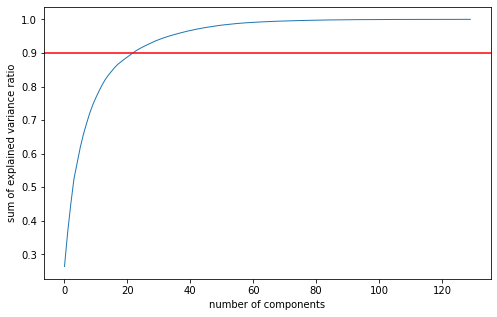

In [6]:
train = train.fillna(train.mean())
plt.figure(figsize=(8,5))
pca = decomposition.PCA().fit(train[features])
plt.plot(np.cumsum(pca.explained_variance_ratio_),linewidth=1)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel("number of components")
plt.ylabel("sum of explained variance ratio")
plt.show()

### In Data Description
Trades with weight = 0 were intentionally included in the dataset for completeness, although such trades will not contribute towards the scoring evaluation.

In [7]:
def distribution(feature,color):
    plt.figure(figsize=(15,7))
    sns.distplot(train[feature],color=color)

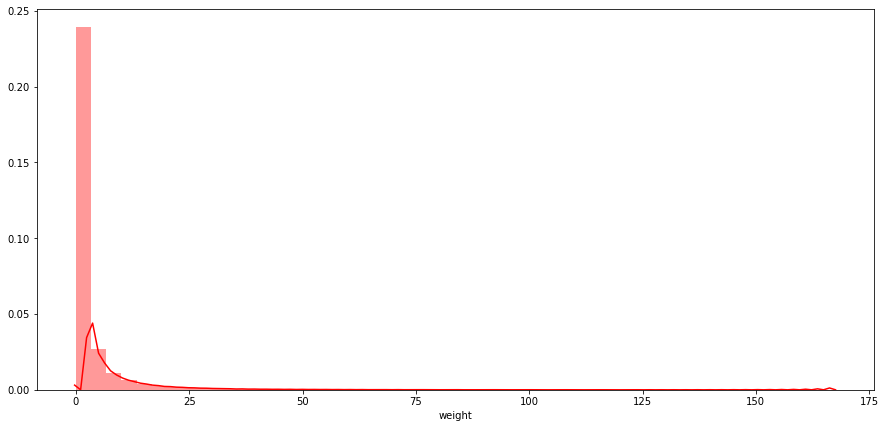

In [8]:
distribution('weight',color='red')

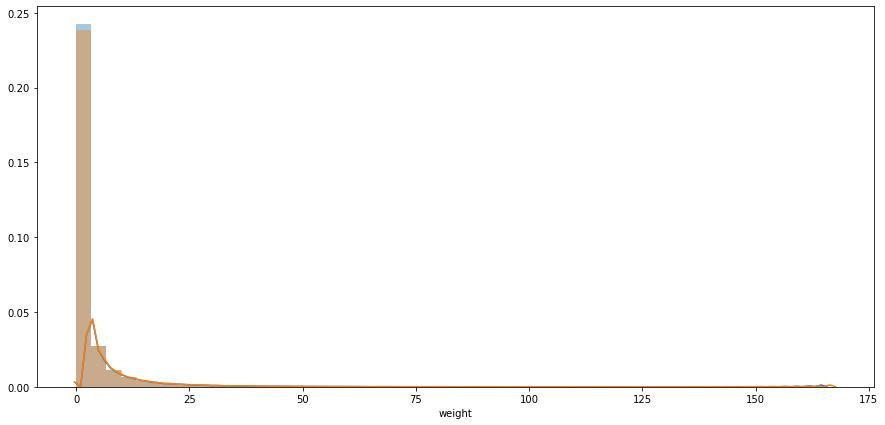

In [9]:
plt.figure(figsize=(15,7))
sns.distplot(train.loc[train['resp']>0,'weight'],label='negative resp')

sns.distplot(train.loc[train['resp']<0,'weight'],label='positive resp')


In [10]:
(train[train['weight']==0])

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id,action
0,0,0.0,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,1.168391,8.313582,1.782433,14.018213,2.653056,12.600291,2.301488,11.445807,0,1
2,0,0.0,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2,1
3,0,0.0,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174379,0.344640,...,2.838853,0.499251,3.033731,1.513488,4.397532,1.266037,3.856384,1.013469,3,0
5,0,0.0,-0.001047,-0.002700,0.000743,0.004667,0.001282,-1,-1.499681,-1.928023,...,0.337112,4.079450,0.613967,6.622410,0.799525,5.231833,0.360831,3.922324,5,1
27,0,0.0,0.006238,0.007605,0.006997,0.008114,0.011115,1,2.305671,0.996686,...,1.309595,4.335369,1.884280,7.717178,2.562021,6.256786,1.803170,4.833785,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390485,499,0.0,0.000337,0.000337,0.003490,0.011295,0.008368,1,-0.367021,0.374556,...,-0.852501,2.134424,-1.399027,-0.446676,-1.939232,0.440354,-1.222572,1.413366,2390485,1
2390486,499,0.0,0.000142,0.000142,0.005829,0.020342,0.015396,1,-1.649365,-1.169997,...,-1.260055,1.947725,-1.994399,-1.685163,-2.866165,-0.216130,-1.892048,0.901585,2390486,1
2390487,499,0.0,0.000012,0.000012,-0.000935,-0.006326,-0.004718,1,2.432943,5.284504,...,1.064936,3.119762,-0.419796,-0.208975,-0.146749,0.730166,0.648452,2.068737,2390487,0
2390488,499,0.0,0.000499,0.000499,0.007605,0.024907,0.016591,1,-0.622475,-0.963682,...,-0.640334,-2.279663,-0.950259,-4.388417,-1.669922,-3.288939,-1.336142,-2.814239,2390488,1


In [11]:
train = train[train['weight']!=0]

In [12]:
import optuna
import lightgbm as lgb
import sklearn
from sklearn.model_selection import train_test_split
train = train.fillna(train.mean())

In [13]:


def objective(trial):
    x_train, x_test, y_train, y_test = train_test_split(train[features+['date']],train.action,test_size=0.33)
    train_data = lgb.Dataset(x_train,y_train)
    
    parameters = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': 0,
        'boosting_type': 'gbdt',

    }
    
    gbm = lgb.train(parameters, train_data)
    preds = gbm.predict(x_test)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    return accuracy

In [14]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2021-01-04 04:09:10,218] A new study created in memory with name: no-name-49853a8c-c1ed-4c7c-9612-e53c28d8e629
[I 2021-01-04 04:09:58,917] Trial 0 finished with value: 0.5477184261843766 and parameters: {}. Best is trial 0 with value: 0.5477184261843766.
[I 2021-01-04 04:10:45,552] Trial 1 finished with value: 0.54670592283868 and parameters: {}. Best is trial 0 with value: 0.5477184261843766.
[I 2021-01-04 04:11:32,856] Trial 2 finished with value: 0.5493885978664016 and parameters: {}. Best is trial 2 with value: 0.5493885978664016.
[I 2021-01-04 04:12:21,172] Trial 3 finished with value: 0.5462914388406683 and parameters: {}. Best is trial 2 with value: 0.5493885978664016.
[I 2021-01-04 04:13:08,964] Trial 4 finished with value: 0.5475241846059725 and parameters: {}. Best is trial 2 with value: 0.5493885978664016.
[I 2021-01-04 04:13:57,581] Trial 5 finished with value: 0.5483393874507705 and parameters: {}. Best is trial 2 with value: 0.5493885978664016.
[I 2021-01-04 04:14:44,4

In [15]:
print("Best trial add date:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Best trial add date:
  Value: 0.5495522502198601
  Params: 


In [16]:
x_train, x_test, y_train, y_test = train_test_split(train[features+['date']],train.action,test_size=0.33, random_state=42)

parameters = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': 0,
        'boosting_type': 'gbdt',
        'lambda_l1': 0.16740059124370754,
        'lambda_l2': 0.12144642325390044,
        'num_leaves': 254,
        'feature_fraction': 0.8029862005476809,
        'bagging_fraction': 0.9981632277195455,
        'bagging_freq': 1,
        'min_child_samples': 5
    }

lgb_train = lgb.Dataset(x_train,y_train)

val_lgb_train = lgb.Dataset(x_train,label=y_train)
val_lgb_test = lgb.Dataset(x_test,label=y_test)

model = lgb.train(
    parameters, lgb_train, valid_sets=[val_lgb_train,val_lgb_test],valid_names = ['train', 'valid'],
    num_boost_round= 10000,
    verbose_eval= 50,
    early_stopping_rounds= 10
)

Training until validation scores don't improve for 10 rounds
[50]	train's binary_logloss: 0.66218	valid's binary_logloss: 0.669099
[100]	train's binary_logloss: 0.644489	valid's binary_logloss: 0.658094
[150]	train's binary_logloss: 0.630667	valid's binary_logloss: 0.651172
[200]	train's binary_logloss: 0.618952	valid's binary_logloss: 0.646462
[250]	train's binary_logloss: 0.607421	valid's binary_logloss: 0.641669
[300]	train's binary_logloss: 0.596419	valid's binary_logloss: 0.637351
[350]	train's binary_logloss: 0.586795	valid's binary_logloss: 0.635108
[400]	train's binary_logloss: 0.577647	valid's binary_logloss: 0.632828
[450]	train's binary_logloss: 0.56841	valid's binary_logloss: 0.629935
[500]	train's binary_logloss: 0.559578	valid's binary_logloss: 0.627551
[550]	train's binary_logloss: 0.551223	valid's binary_logloss: 0.625552
[600]	train's binary_logloss: 0.54294	valid's binary_logloss: 0.623789
[650]	train's binary_logloss: 0.53537	valid's binary_logloss: 0.622263
Early st

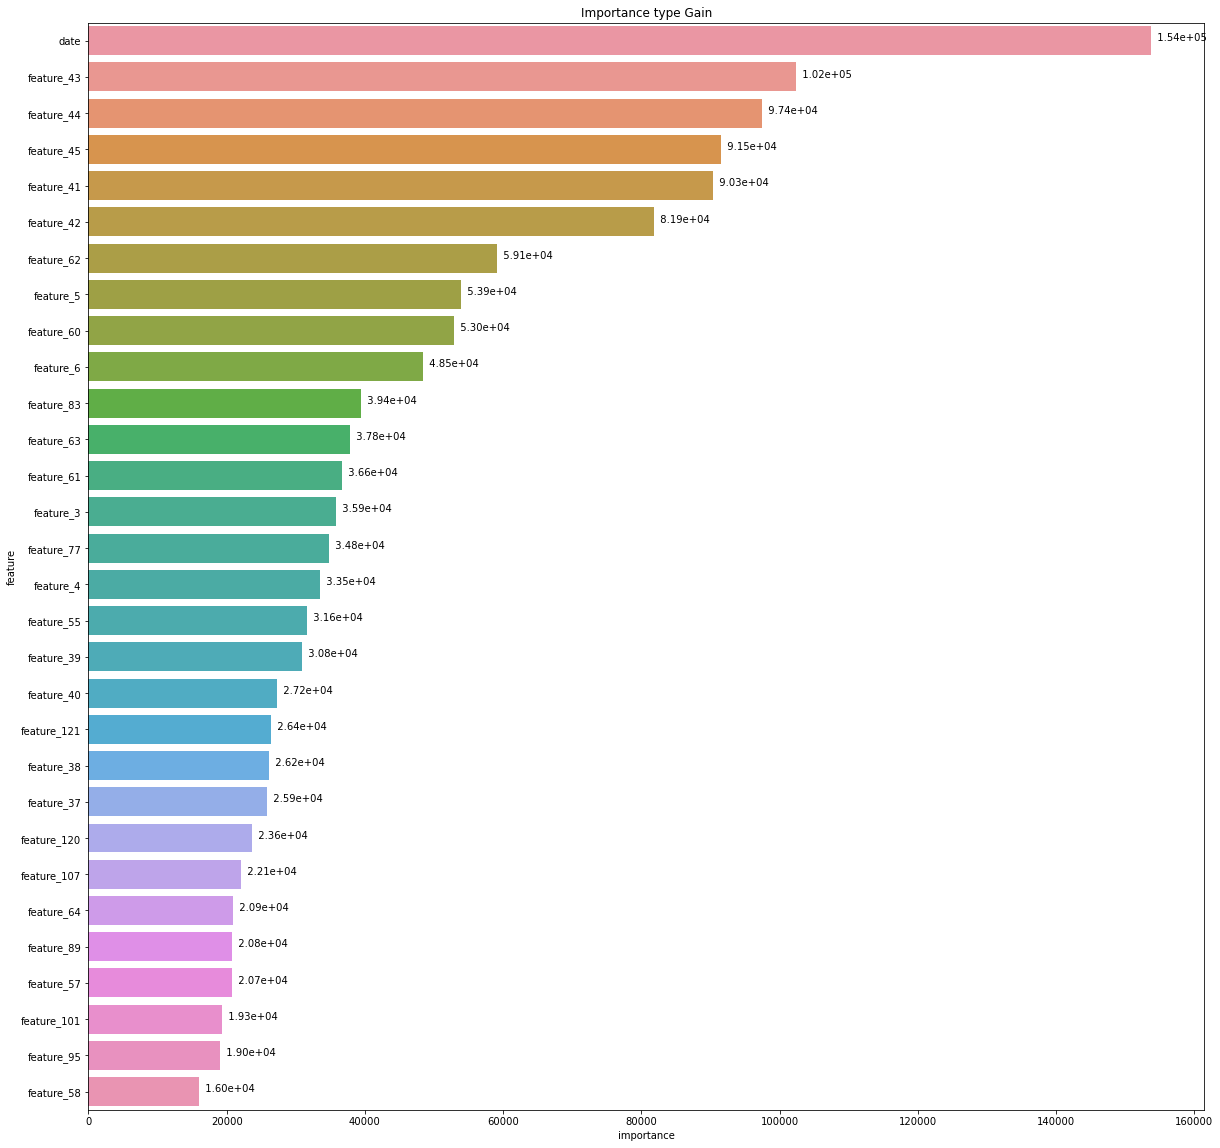

In [17]:
feature_importance = pd.DataFrame({"feature":features+['date'],"importance":model.feature_importance(importance_type='gain')})
feature_importance = feature_importance.sort_values(by='importance',ascending=False)

plt.figure(figsize=(20,20))
sns.barplot(data=feature_importance[:30:],x='importance',y='feature')
plt.title("Importance type Gain")

Gain_feature = []

for idx, v in enumerate(feature_importance.importance[:30:]):
        plt.text(v, idx, "  {:.2e}".format(v))

In [18]:
feature_importance.feature[:30:].to_numpy()

array(['date', 'feature_43', 'feature_44', 'feature_45', 'feature_41',
       'feature_42', 'feature_62', 'feature_5', 'feature_60', 'feature_6',
       'feature_83', 'feature_63', 'feature_61', 'feature_3',
       'feature_77', 'feature_4', 'feature_55', 'feature_39',
       'feature_40', 'feature_121', 'feature_38', 'feature_37',
       'feature_120', 'feature_107', 'feature_64', 'feature_89',
       'feature_57', 'feature_101', 'feature_95', 'feature_58'],
      dtype=object)